The task of the assignment #5 is Hyperparameter Optimization (HPO) of a neural network, with the aim to maximize its Accuracy on 10 fold cross validation.
The dataset to use is named "fertility", available on the "OpenML" website:
https://www.openml.org/d/1473
Different file format are available (csv,arff,json,...)
The dataset refers to a binary classification problem and consists of around 100 instances and 9 numeric features (excluding the class).

You can use Python (e.g., SMAC3 for HPO and scikitlearn for neural network), R (e.g., mlrMBO for HPO and mlr+neuralnet for neural netowrk) or Java (e.g., SMAC for HPO and WEKA for neural netowrk)


The task consists in the following steps:

STEP 1 - HPO for just 2 neural network's hyper-parameters
The neural network must have 2 hidden layers with 4 units in the first hidden layer and 2 neurons in the second one.
You can set all the other hyperparameters as you prefer (you can use the default values) and optimize the following 2 hyperparameters (HPO):
 - learning rate (numeric in 0.01 - 0.1) . (aka C)
 - [only for R] --> threshold (numeric in 0.01 - 0.1)
 - [only for Python/Java] --> momentum (numeric in 0.1 - 0.9) (aka gamma)

Choose between Gaussian Process (GP) or Random Forest (RF) as surrogate model.
Use 5 initial random configurations of the hyperparameters as initial design, then perform:
 - 20 iterations of Sequential Model Based Optimization (SMBO) using an acquisition function
 - 20 iterations of SMBO using another acquisition function
Note: the initial design must be the same between the two SMBO experiments related to the different acquisition functions
Compare results against 25 configurations in Grid Search and 25 configurations sampled via Pure Random Search


STEP 2 - HPO for just 4 neural network's hyper-parameters
In this step use SMBO to optimize, along with the two previous hyper-parameters, the number of units in the two hidden layers. Number of units ranges in 1 to 5 for both the two hidden layers
In this case use RF and expand the budget as follows:
 - 10 initial configurations randomly chosen (initial design)
 - 100 iterations of SMBO using an acquisition function
 - 100 iterations of SMBO using another acquisition function
Note: as in the previous step, the initial design must be the same between the two SMBO experiments related to the different acquisition functions

In this case is not required any comparison with Grid Search and Random Search.



Your must summarize the results obtained, plot the evolution of "best seen" for the different experiments, provides conclusions and discussion about the results

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [0.01933986 0.60113912]. 	  0.8814141414141415 	 0.8814141414141415
init   	 [0.05253709 0.1413891 ]. 	  0.8814141414141415 	 0.8814141414141415
init   	 [0.01881202 0.18570262]. 	  0.8814141414141415 	 0.8814141414141415
init   	 [0.06470236 0.19200362]. 	  0.8814141414141415 	 0.8814141414141415
init   	 [0.0338571  0.42250566]. 	  0.8814141414141415 	 0.8814141414141415
1      	 [0.1 0.9]. 	  0.849191919191919 	 0.8814141414141415
2      	 [0.01 0.9 ]. 	  0.8814141414141415 	 0.8814141414141415
3      	 [0.01       0.41133808]. 	  0.8814141414141415 	 0.8814141414141415
4      	 [0.01       0.73842282]. 	  0.8814141414141415 	 0.8814141414141415
5      	 [0.03771498 0.26359375]. 	  0.8814141414141415 	 0.8814141414141415
6      	 [0.01       0.57199463]. 	  0.8814141414141415 	 0.8814141414

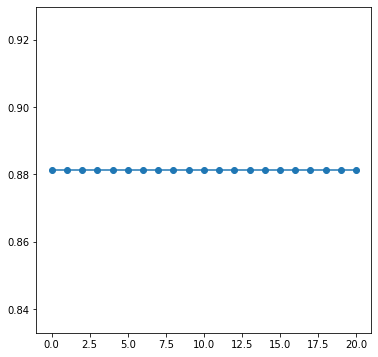

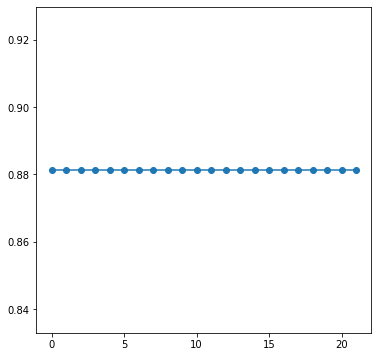

In [0]:
!pip install pyGPGO


import numpy as np
from pyGPGO.covfunc import squaredExponential
from pyGPGO.surrogates.GaussianProcess import GaussianProcess
from pyGPGO.GPGO import GPGO
from pyGPGO.acquisition import Acquisition
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from google.colab import drive
drive.mount('/content/drive')
from scipy.io import arff
import pandas as pd
import warnings
warnings.filterwarnings('ignore') 

ds = pd.read_csv(open("drive/My Drive/Colab Notebooks/Assignment 5/php9pgo5r.csv","rb"))
y = ds.Class
x = ds.drop('Class', axis=1)


def compute_accuracy_SVC(C,gamma):
        clf = MLPClassifier(hidden_layer_sizes=(4, 2), learning_rate_init=C, momentum=gamma, solver='sgd')
        scores = cross_val_score(clf, x, y, cv=10)
        return (scores.mean())


initialPoints = 5
furtherEvaluations = 20
 
param = {'C': ('cont', [0.01,0.1]),'gamma': ('cont', [0.1,0.9])} 

sexp = squaredExponential()
sur_model = GaussianProcess(sexp)

acq1 = Acquisition(mode="ExpectedImprovement")
acq2 = Acquisition(mode="ProbabilityImprovement")

bo1 = GPGO(sur_model,acq1,compute_accuracy_SVC,param)
#bo1._firstRun(n_eval=initialPoints)

xrange = list(param.values())[0][1]
yrange = list(param.values())[1][1]


bo1.run(max_iter=furtherEvaluations, init_evals=initialPoints)
r1=bo1.getResult()

bo2 = GPGO(sur_model,acq2,compute_accuracy_SVC,param)

#setting the same init 
bo2.X = bo1.X
bo2.y = bo1.y
bo2.GP.fit(bo2.X, bo2.y)
bo2.tau = np.max(bo2.y)
bo2.history.append(bo2.tau)

bo2.run(max_iter=furtherEvaluations,init_evals=initialPoints)
r2=bo2.getResult()

print(r1)
print(r2)


def plot_obo_history(obo, acq_index):
    plt.figure(figsize=(6,6))
    plt.plot(obo.history, marker="o")
    #plt.savefig("images_step2/obo_history_fig_acq{}".format(acq_index))
    print("\nAll created iteration images have been saved to images folder")
  
plot_obo_history(bo1, acq1)
plot_obo_history(bo2, acq2)

## Grid Search

Best on the grid:0.8914%%


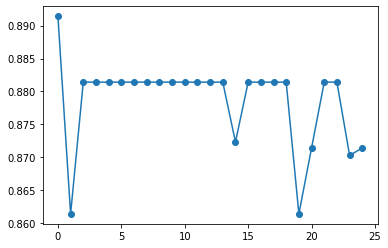

In [0]:
C_values = np.linspace(xrange[0],xrange[1],5)
gamma_values = np.linspace(yrange[0],yrange[1],5)

res = [0 for n in range(25)]
count = 0
for cc in C_values:
    for gg in gamma_values:
        res[count] = compute_accuracy_SVC( cc, gg )
        count = count+1
plt.plot(res, marker="o")
gridsearch=str(round(max(np.asarray(res)),4))
print("Best on the grid:"+str(round(max(np.asarray(res)),4))+"%%")

## Random Search

Best on the grid:0.8914%%


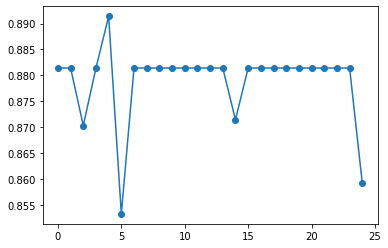

In [0]:
import time   
import random  
res2 = [0 for n in range(25)]
count=0

for i in range (25):
  g1=random.uniform(xrange[0], xrange[1])
  g2=random.uniform(yrange[0], yrange[1])
  res2[count] = compute_accuracy_SVC( g1, g2 )
  count=count+1

plt.plot(res2, marker="o")
randomsearch=str(round(max(np.asarray(res2)),4))

print("Best on the grid:"+str(round(max(np.asarray(res2)),4))+"%%")



## Parte 2

In [0]:
from pyGPGO.surrogates.RandomForest import RandomForest

def compute_accuracy_SVC2(C,gamma,layer1_size, layer2_size):
        clf = MLPClassifier(hidden_layer_sizes=(int(layer1_size), int(layer2_size)), learning_rate_init=C, momentum=gamma, solver='sgd')
        scores = cross_val_score(clf, x, y, cv=10)
        return (scores.mean())


initialPoints = 10
furtherEvaluations = 100

 
param = {'C': ('cont', [0.01,0.1]),'gamma': ('cont', [0.1,0.9]),'layer1_size': ('int', [1,6]),'layer2_size': ('int', [1,6])} 

sur_model = RandomForest()


acq1 = Acquisition(mode="ExpectedImprovement")
acq2 = Acquisition(mode="ProbabilityImprovement")

bo1 = GPGO(sur_model,acq1,compute_accuracy_SVC2,param)

xrange = list(param.values())[0][1]
yrange = list(param.values())[1][1]


bo1.run(max_iter=furtherEvaluations, init_evals=initialPoints)
r12=bo1.getResult()

bo2 = GPGO(sur_model,acq2,compute_accuracy_SVC2,param)

bo2.X = bo1.X
bo2.y = bo1.y
bo2.GP.fit(bo2.X, bo2.y)
bo2.tau = np.max(bo2.y)
bo2.history.append(bo2.tau)

#bo2._firstRun(n_eval=initialPoints)

bo2.run(max_iter=furtherEvaluations,
        init_evals=initialPoints)
r22=bo2.getResult()

print(r12)
print(r22)

Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [0.04547813 0.19643327 1.         2.        ]. 	  0.8814141414141415 	 0.8814141414141415
init   	 [0.09119496 0.45791395 2.         2.        ]. 	  0.8814141414141415 	 0.8814141414141415
init   	 [0.02785273 0.7929755  5.         4.        ]. 	  0.8814141414141415 	 0.8814141414141415
init   	 [0.08064327 0.56769181 5.         2.        ]. 	  0.8814141414141415 	 0.8814141414141415
init   	 [0.07271929 0.56048535 1.         2.        ]. 	  0.8814141414141415 	 0.8814141414141415
init   	 [0.03368673 0.47507576 4.         1.        ]. 	  0.8814141414141415 	 0.8814141414141415
init   	 [0.04413337 0.49029427 4.         2.        ]. 	  0.8814141414141415 	 0.8814141414141415
init   	 [0.08230711 0.66229093 1.         4.        ]. 	  0.8814141414141415 	 0.8814141414141415
init   	 [0.02738144 0.11133952 3.         2.        ]. 	  0.8814141414141415 	 0.8814141414141415
init   	 [0.01441173 0.43446815 5.         1.      


All created iteration images have been saved to images folder

All created iteration images have been saved to images folder


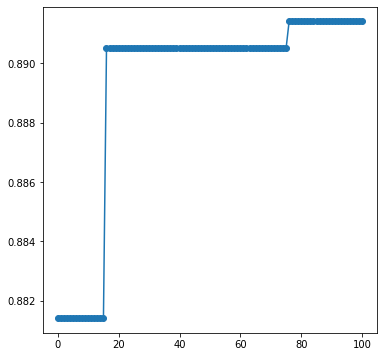

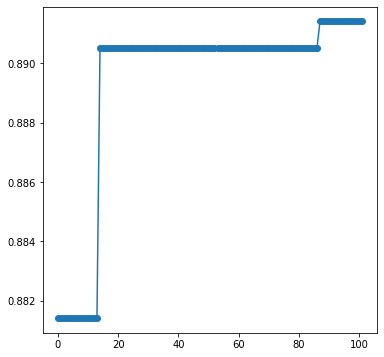

In [0]:
def plot_obo_history(obo, acq_index):
    plt.figure(figsize=(6,6))
    plt.plot(obo.history, marker="o")
    #plt.savefig("images_step2/obo_history_fig_acq{}".format(acq_index))
    print("\nAll created iteration images have been saved to images folder")
  
plot_obo_history(bo1, acq1)
plot_obo_history(bo2, acq2)

## Grafici


In [0]:
print(x.shape)
print(y.shape)


(100, 9)
(100,)


[0.8814141414141415, 0.8814141414141415, 0.8914, 0.8914]


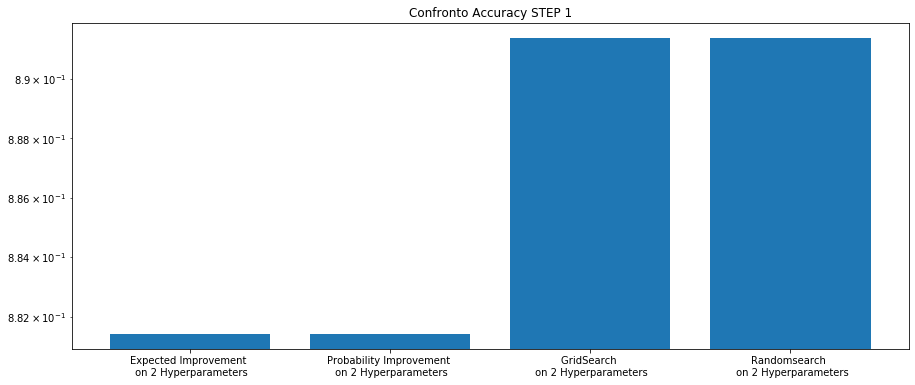

In [0]:
bae_first_ei=r1[1]
bae_first_pi=r2[1]

bae_second_ei=r12[1]
bae_second_pi=r22[1]


names = ['Expected Improvement \n on 2 Hyperparameters', 'Probability Improvement \n on 2 Hyperparameters', 'GridSearch \n on 2 Hyperparameters', 'Randomsearch \n on 2 Hyperparameters']
values = [bae_first_ei, bae_first_pi, float(gridsearch), float(randomsearch)]
print(values)
plt.figure(figsize=(15, 6))
plt.bar(names, values)
plt.title("Confronto Accuracy STEP 1")
plt.yscale('log')
plt.show()

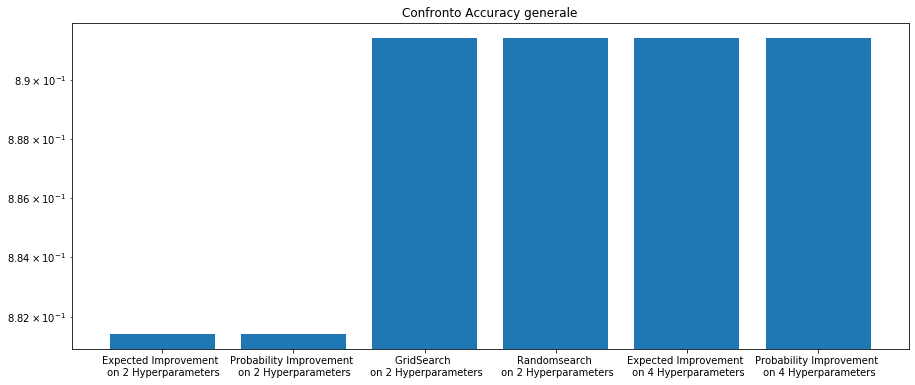

In [0]:
bae_first_ei=r1[1]
bae_first_pi=r2[1]

bae_second_ei=r12[1]
bae_second_pi=r22[1]

names = ['Expected Improvement \n on 2 Hyperparameters', 'Probability Improvement \n on 2 Hyperparameters', 'GridSearch \n on 2 Hyperparameters', 'Randomsearch \n on 2 Hyperparameters', 'Expected Improvement \n on 4 Hyperparameters', 'Probability Improvement \n on 4 Hyperparameters']
values = [bae_first_ei, bae_first_pi, float(gridsearch), float(randomsearch), bae_second_ei, bae_second_pi]
plt.figure(figsize=(15, 6))
plt.bar(names, values)
plt.title("Confronto Accuracy generale")
plt.yscale('log')
plt.show()

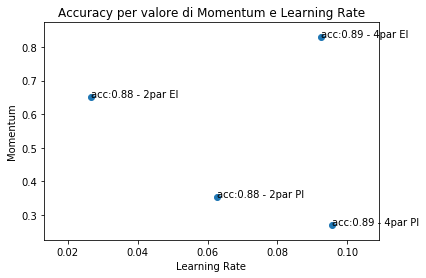

In [0]:
import matplotlib.pyplot as plt

learning_ei1=r1[0]
learning_ei1=learning_ei1['C']
momentum_ei1=r1[0]
momentum_ei1=momentum_ei1['gamma']

learning_pi1=r2[0]
learning_pi1=learning_pi1['C']
momentum_pi1=r2[0]
momentum_pi1=momentum_pi1['gamma']


learning_ei2=r12[0]
learning_ei2=learning_ei2['C']
momentum_ei2=r12[0]
momentum_ei2=momentum_ei2['gamma']

learning_pi2=r22[0]
learning_pi2=learning_pi2['C']
momentum_pi2=r22[0]
momentum_pi2=momentum_pi2['gamma']


n = ["acc:"+str(round(bae_first_ei,2))+" - 2par EI", "acc:"+str(round(bae_first_pi,2))+" - 2par PI","acc:"+str(round(bae_second_ei,2))+" - 4par EI", "acc:"+str(round(bae_second_pi,2))+" - 4par PI" ]
z = [learning_ei1, learning_pi1, learning_ei2, learning_pi2]
y = [momentum_ei1, momentum_pi1, momentum_ei2, momentum_pi2]

fig, ax = plt.subplots()
ax.scatter(z, y)
ax.set_xlabel('Learning Rate')
ax.set_ylabel('Momentum')
ax.set_title("Accuracy per valore di Momentum e Learning Rate")



for i, txt in enumerate(n):
    ax.annotate(txt, (z[i], y[i]))

